In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def prob(z, r, T):
    """Create a function similar to likelihood fn of x_i, sigma^2 for Kalman smoothing
    
    Attributes:
        z: measured value of x_i
        r: inverse variance of measurement
        T: number of timesteps
    """
    return lambda x, sigma: np.exp(-1/2 * (r*(x-z)**2 + x ** 2/sigma + T*np.log(sigma)))


def marginal_prob(c=3, d=3):
    return lambda sigma: c/np.sqrt(sigma)* np.exp(-1/(d* sigma)) 


In [3]:
# plot data parameters and series
z = 2
r = 1.5
T = 1
c = 1
d = 1
psurface = np.vectorize(prob(z, r, T))
sigma_of_x = np.vectorize(lambda x: x**2/T)
marginal_func = np.vectorize(lambda sigma: marginal_prob(c, d)(sigma))
x_min = .1
x_max = 2
sigma_min = sigma_of_x(x_min)
sigma_max = sigma_of_x(x_max)

n = 30
# x_steps = np.linspace(x_min, x_max, n)
x_steps = np.logspace(np.log(x_min), 1, n, base=np.e)
# sigma_steps = np.logspace(np.log(sigma_min), 1, n, base=np.e)
# sigma_steps = np.linspace(sigma_min, sigma_max, n)
argmax_sigma = sigma_of_x(x_steps)
sigma_steps = argmax_sigma
sigma_lattice, x_lattice = np.meshgrid(sigma_steps, x_steps)

[Text(0.0, 0, ''),
 Text(0.1, 0, ''),
 Text(0.2, 0, ''),
 Text(0.30000000000000004, 0, ''),
 Text(0.4, 0, ''),
 Text(0.5, 0, '')]

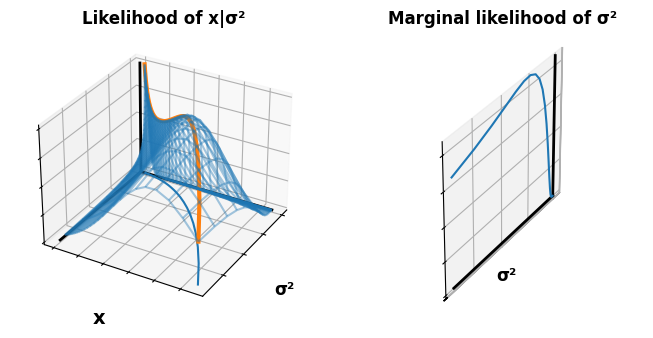

In [4]:
fig = plt.figure(figsize=[8,4])
# 3dplot parameters
transparency = .4
rotation = 50
partial_w = 3
# 3dplot parameters
transparency = .4
rotation = 30
partial_w = 3

# plot sigma on the "x" axis and x on the "y" axis 
ax1 = sigma_lattice
ax1_vals = sigma_steps
ax1_label = "\u03C3\u00B2"
ax2 = x_lattice
ax2_vals = x_steps
ax2_label = "x"
ax1_partial = argmax_sigma
ax2_partial = x_steps
# These may implicitly set axis orientation of x and sigma. 
# reorienting x and sigma requires potentially 
argmax_p = psurface(x_steps, argmax_sigma)
z_likelihood = psurface(x_lattice, sigma_lattice)
z_marginal = marginal_func(sigma_steps)
# plot 1
ax = fig.add_subplot(1, 2, 1, projection='3d', azim=rotation)
ax.set_title("Likelihood of x|\u03C3\u00B2", weight="semibold", size=12)
ax.plot([0, ax1.max()], [0,0], [0,0], color="black", linewidth=2)
ax.plot([0,0], [0,ax2.max()], [0,0], color="black", linewidth=2)
ax.plot([0,0], [0,0], [0, z_likelihood.max()], color="black", linewidth=2)
ax.plot_wireframe(ax1, ax2, z_likelihood, alpha=transparency)
ax.set_ylabel("x", weight="semibold", size=14)
ax.set_xlabel("\u03C3\u00B2", weight="semibold", size=12)
ax.set_xticklabels(())
ax.set_yticklabels(())
ax.set_zticklabels(())
ax.plot(ax1_partial, ax2_partial)
ax.plot(ax1_partial, ax2_partial, argmax_p, linewidth=partial_w)

# plot 2
ax = fig.add_subplot(1, 2, 2, projection='3d', azim=rotation, box_aspect=(4, .01, 3))
ax.set_title("Marginal likelihood of \u03C3\u00B2", weight="semibold", size=12)
p_prior = np.vectorize(marginal_prob(2, 4))
prior_values = p_prior(ax1_vals)
ax.plot([0,ax1_vals.max()], [0,0], [0,0], color="black", linewidth=2)
ax.plot([0,0], [0,0], [0, z_marginal.max()], color="black", linewidth=2)
ax.plot(ax1_vals, np.zeros_like(ax1_vals), z_marginal)
ax.set_ylim([0,.1])
# ax.set_zlim([0,.55])
ax.set_ylabel("x", weight="semibold", size=14)
ax.set_xlabel("\u03C3\u00B2", weight="semibold", size=12)
ax.set_xticklabels(())
ax.set_yticklabels(())
ax.set_zticklabels(())


Text(0.5, 0, 'σ²')

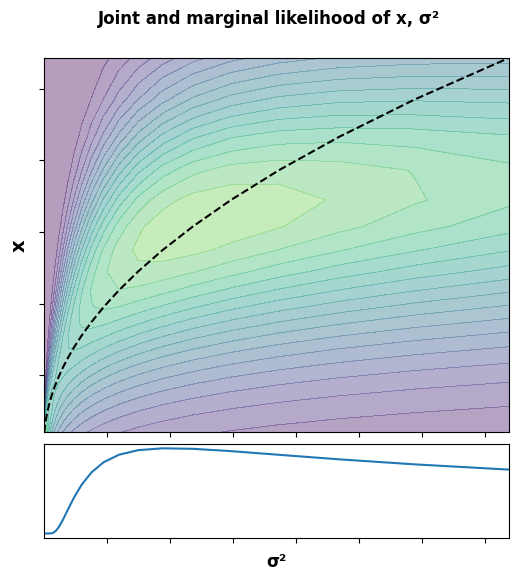

In [5]:
fig = plt.figure(figsize=(6, 6))
fig.suptitle("Joint and marginal likelihood of x, \u03C3\u00B2", weight="semibold", size=12)
gs = fig.add_gridspec(2, 1,  width_ratios=(1, ), height_ratios=(4, 1),
                      bottom=0.1, top=0.9, hspace=0.05)
ax = fig.add_subplot(gs[0, 0])
ax_marg = fig.add_subplot(gs[1, 0], sharex=ax)
ax.contourf(ax1, ax2, z_likelihood, alpha=transparency, levels=20)
ax.set_ylabel("x", weight="semibold", size=14)
ax.set_xticklabels(())
ax.set_yticklabels(())
ax.plot(ax1_partial, ax2_partial, "k--")
ax_marg.plot(ax1_vals, z_marginal)
ax_marg.set_yticks(())
ax_marg.set_xlabel("\u03C3\u00B2", weight="semibold", size=12)



